In [31]:
import pandas as pd
import numpy as np  
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [32]:
# train = pd.read_csv('./data/train.csv')
# test = pd.read_csv('./data/test.csv')

In [33]:
train=pd.read_csv('./data/cured_train.csv')

In [47]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)


NameError: name 'test' is not defined

In [4]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [24]:
train.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NAlley,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NAlley,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NAlley,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NAlley,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NAlley,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NAlley,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NAlley,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NAlley,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NAlley,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NAlley,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [6]:
# numeric_features = train.select_dtypes(include=[np.number])
# numeric_features.dtypes

In [39]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,3,5,5,5,7,7,5,2,9,8,...,5,25,3,5,8,6,6,9,2,2
top,NAlley,1Fam,TA,No,Unf,Unf,TA,Y,Norm,Norm,...,NMF,NAmes,Y,NPool,CompShg,Gable,Normal,WD,Pave,AllPub
freq,1369,1220,1311,955,430,1256,650,1365,1260,1445,...,1405,225,1340,1450,1434,1141,1198,1267,1454,1459


In [25]:
def onehotencode(x):  #onehot encode
    a=train[x].tolist()
    a1=array(a)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(a1)
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    end=onehot_encoded.tolist()
    train[x]=end



In [ ]:
#1cach encoding khac 

In [34]:
print (train.FireplaceQu.value_counts(), "\n")

NFQu    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64 



In [35]:
# qual_dict = {"NONE": 0, "Po": 1, "Fa": 2, "TA": 4, "Gd": 7, "Ex": 11,"NFQu": 0,"NG":0,"NPool":0}
qual_dict = {"Po": 1, "Fa": 2, "TA": 4, "Gd": 7, "Ex": 11,"NFQu": 0,"NG":0,"NPool":0,"NoBsmt":0}
qual_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
             "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

In [36]:
columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','SaleType','SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC', 'CentralAir','Electrical','KitchenQual','Functional',
 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','GarageYrBlt','MiscFeature','PoolQC']

In [38]:
len(columns)

44

In [39]:
def discretize(df, cols):  #ncode theo 1 cach ngau nhien khac 
    for col in cols:
        # df[col] = df[col].fillna("NONE")
        if col in qual_cols:
            df[col] = df[col].map(qual_dict).astype('int')
        else:
            df[col] = df[col].astype('category')
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [40]:
discretize(train,columns)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
def encodeskl(x): #khong co gì đặc biệt
    a=train[x].tolist()
    le.fit(a)
    b=le.transform(a)
    train[x]=b


In [60]:
print (train.GarageQual.value_counts(), "\n")

NG    1460
Name: GarageQual, dtype: int64 



In [17]:
print (train.SaleType.value_counts(), "\n")

8    1267
6     122
0      43
3       9
5       5
4       5
1       4
7       3
2       2
Name: SaleType, dtype: int64 



In [57]:
x=train['GarageQual'].value_counts().index.tolist()
print(x[0])

NG


In [30]:
print (train.FireplaceQu.value_counts(), "\n")
print(type(train))

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]    690
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]    380
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]    313
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]     33
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]     24
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]     20
Name: FireplaceQu, dtype: int64 

<class 'pandas.core.frame.DataFrame'>


In [12]:
# a=train.pivot_table(index='MSZoning',values='SalePrice',aggfunc=np.median)
# b=a.sort_values(by=['SalePrice'])
# print(b)

In [13]:
# c=b['SalePrice'].index.tolist()
# d=b['SalePrice'].values.tolist()

In [14]:
    # y=train['MSZoning'].value_counts().index.tolist()
    # n=len(y)
    # def ham(x):
    #     for i in range(len(y)):
    #         if(x == c[i]): return d[i]/d[0]
    # train['MSZoning']=train['MSZoning'].apply(ham)


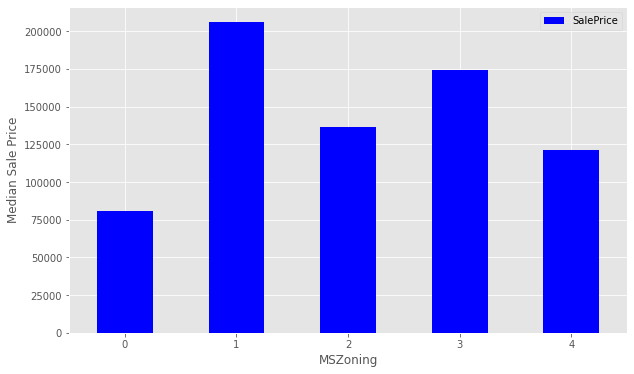

In [41]:
condition_pivot = train.pivot_table(index='MSZoning', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('MSZoning')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

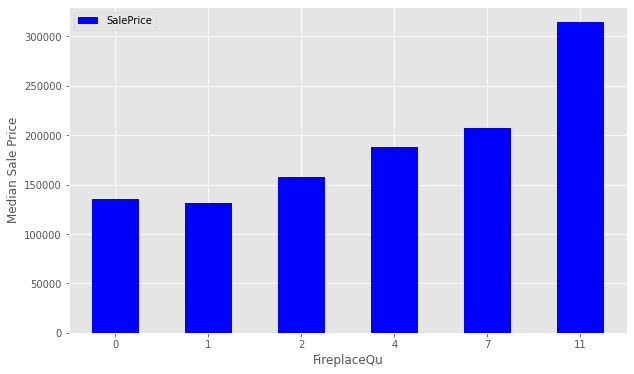

In [42]:
condition_pivot = train.pivot_table(index='FireplaceQu', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('FireplaceQu')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [17]:
def encode(name):  #encode theo gia tien
    a=train.pivot_table(index=name,values='SalePrice',aggfunc=np.median)
    b=a.sort_values(by=['SalePrice'])
    c=b['SalePrice'].index.tolist()
    d=b['SalePrice'].values.tolist()
    y=train[name].value_counts().index.tolist()
    n=len(y)
    def ham(x):
        for i in range(len(y)):
            if(x == c[i]): return round(d[i]/d[0],2)
    train[name]=train[name].apply(ham)

In [12]:
columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','SaleType','SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC', 'CentralAir','Electrical','KitchenQual','Functional',
 'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','GarageYrBlt','MiscFeature','PoolQC']

In [31]:
len(columns)

44

In [20]:
for i in range(len(columns)):
    encode(columns[i])

In [13]:
for i in range(len(columns)):
    encodeskl(columns[i])

In [26]:
for i in range(len(columns)):
    onehotencode(columns[i])

In [19]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,1,3,0,4,3,706.0,0.0,...,8,0,1,8,856.0,0,0,2003,2003,2008
1,1262,0,0,1,3,0,4,1,978.0,0.0,...,8,0,1,6,1262.0,0,298,1976,1976,2007
2,920,866,0,1,3,0,4,2,486.0,0.0,...,8,0,1,6,920.0,0,0,2001,2002,2008
3,961,756,0,1,3,0,1,3,216.0,0.0,...,8,0,1,7,756.0,0,0,1915,1970,2006
4,1145,1053,0,1,4,0,4,0,655.0,0.0,...,8,0,1,9,1145.0,0,192,2000,2000,2008


In [83]:
train.to_csv('train_encodengaunhienkhac.csv')